In [1]:
# === CONFIG + MODULE IMPORTS ===
from dotenv import load_dotenv
load_dotenv()

import sys
sys.path.append("../modules")

from jira_api import get_last_n_months_issues
from metrics_calculations import parse_issues_to_dataframe, group_lead_time_by_assignee, identify_outliers
from visualizations import plot_lead_time_trend
from visualizations import plot_lead_time_trend_exclude_extremes
from utils import report_outliers

import pandas as pd
import matplotlib.pyplot as plt

PROJECT_KEY = "ITSEC"  # Replace with other project keys as needed
MONTHS_LOOKBACK = 6


In [2]:
# === FETCH & PARSE ISSUES ===
issues = get_last_n_months_issues(PROJECT_KEY, months=MONTHS_LOOKBACK)
df = parse_issues_to_dataframe(issues)
df["Month"] = df["resolved"].dt.to_period("M")

print(f"Issues retrieved: {len(df)}")


Issues retrieved: 49


In [3]:
# === OUTLIER ANALYSIS (Z-score based) ===
outliers = identify_outliers(df, z_threshold=2.0)
if not outliers.empty:
    print("⚠️ Lead Time Outliers (Z ≥ 2.0):")
    display(outliers[["key", "summary", "lead_time_days", "assignee"]])
else:
    print("No significant outliers detected.")


⚠️ Lead Time Outliers (Z ≥ 2.0):


,key,summary,lead_time_days,assignee
0,ITSEC-485,Investigate admin account passwords that don't...,1942,James Gullickson
2,ITSEC-2113,"Identify applicable frameworks ISO, CIS, HIPAA...",886,None


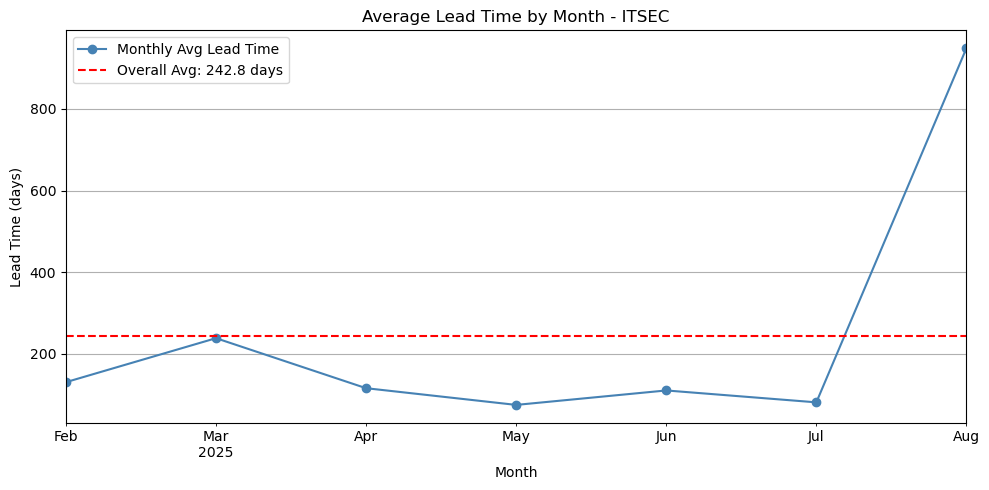

In [4]:
plot_lead_time_trend(df, PROJECT_KEY)

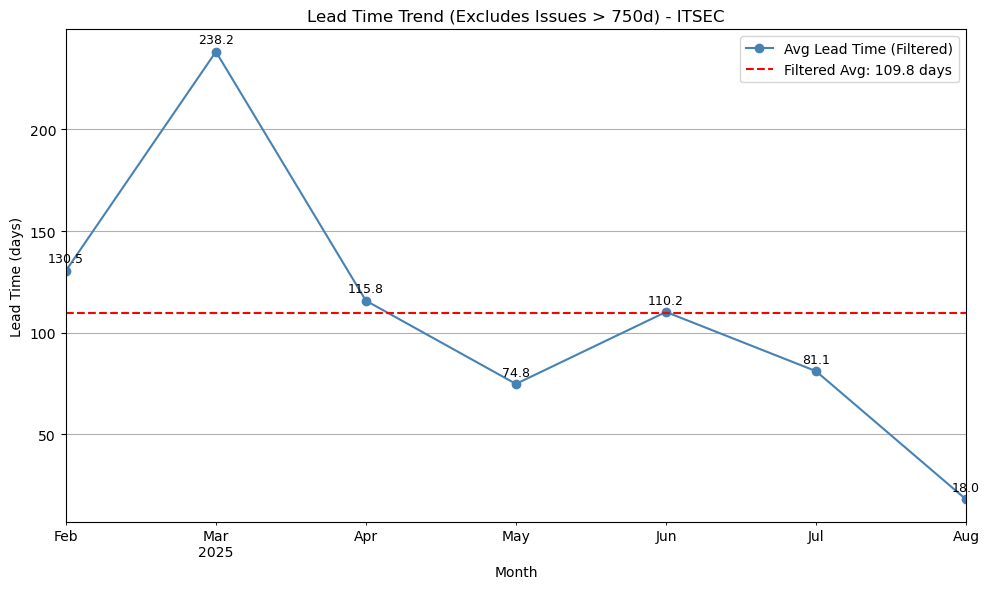


📊 Monthly Lead Time Averages (Includes All Data):


,Month,Avg Lead Time (All Issues)
0,2025-02,130.5
1,2025-03,238.2
2,2025-04,115.8
3,2025-05,74.8
4,2025-06,110.2
5,2025-07,81.1
6,2025-08,948.7



⚠️ Excluded Issues (Lead Time > 750 days):


,key,summary,parent_summary,assignee,created,resolved,lead_time_days
0,ITSEC-485,Investigate admin account passwords that don't...,Shared Accounts and Service Accounts - discove...,James Gullickson,2020-04-17 09:32:50,2025-08-12 09:20:30,1942
2,ITSEC-2113,"Identify applicable frameworks ISO, CIS, HIPAA...",Define Promega's Cybersecurity Policy Program,None,2023-03-06 12:56:57,2025-08-08 15:50:35,886


In [5]:
plot_lead_time_trend_exclude_extremes(df, PROJECT_KEY, threshold_days=750)


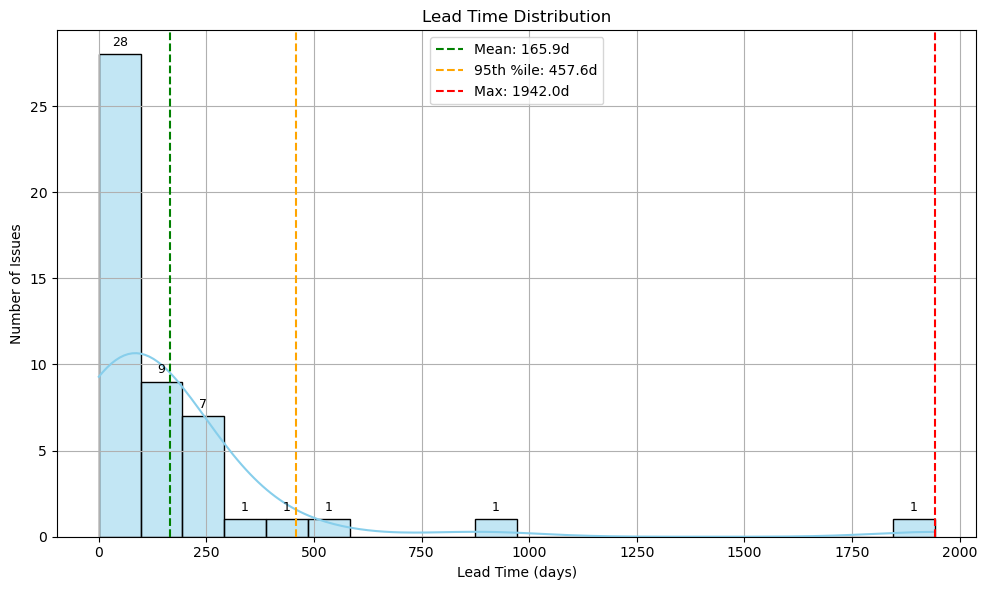

In [6]:
# === LEAD TIME DISTRIBUTION CHART ===
from visualizations import plot_lead_time_distribution
plot_lead_time_distribution(df)


In [7]:
# === DEBUG: FULL ISSUE TABLE ===
# Uncomment to see full issue data including lead time and resolution dates

# import pandas as pd
# pd.set_option('display.max_rows', None)
# display(df[["key", "summary", "assignee", "created", "resolved", "lead_time_days"]])


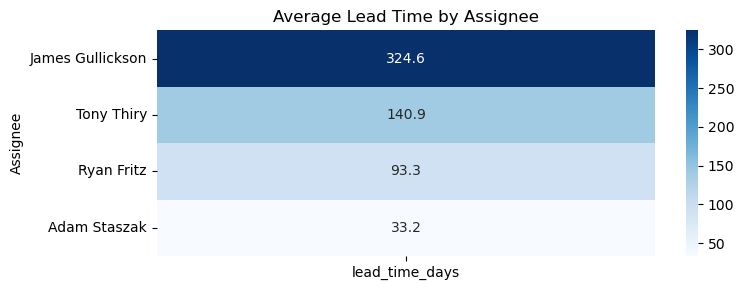

In [8]:
# === LEAD TIME BY ASSIGNEE CHART ===
# from visualizations import plot_lead_time_heatmap_by_assignee
# plot_lead_time_heatmap_by_assignee(df)


In [9]:
# === LEAD TIME BY ASSIGNEE (Optional) ===
# leadtime_by_assignee = group_lead_time_by_assignee(df)
# print("Lead Time by Assignee:")
# print(leadtime_by_assignee)


Lead Time by Assignee:
           assignee  lead_time_days
1  James Gullickson      324.583333
3        Tony Thiry      140.857143
2        Ryan Fritz       93.347826
0      Adam Staszak       33.200000
